# Python Library: NetworkX

Networks are a useful tool for modelling **relationships** between **entities**.     
By modelling data as a network, we can gain insight into:        
Important entities (or nodes): influencer in a social network.      
Pathfinding: optimising transportation between cities.       
Clustering: find communities in the network.      

Networks are described by two sets of items: **nodes** and **edges**. Together these form a network, known as *graph*.     
Nodes and edges can have metadata associated with them. e.g. nodes can be two person with id no. and age, while edge represents Friendship associated with a date (they first met each other).      



In [10]:
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
# initialize an empty Graph to which we can add nodes and edges
G = nx.Graph()

# add integer 1,2,3 as nodes to G
G.add_nodes_from([1,2,3])

# inspect and return a list of nodes
print(G.nodes())

[1, 2, 3]


In [8]:
# add edge between nodes 1 and 2
G.add_edge(1,2)
# returns a list of turple, where each turple shows the nodes that are present on that edge
print(G.edges())

[(1, 2)]


In [9]:
# add node 1 a "label" with the value "blue"
# somewhat like a dict
G.node[1]["label"] = "blue"

# retrieve the node list with the metadat attached
# return a list of 2-turples, first element of each turple is the nodes, second elelment is a dict
# where k-v pairs correspind to the metadata
G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

/Users/XavierTang/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


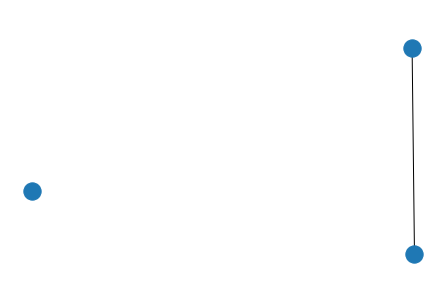

In [11]:
# draw node-link
nx.draw(G)
plt.show()

## 1. Types of graph

**Undirected graphs**:      
Like friendship status in Facebook.     
Comprise of edges that do not have any inherent directionality associated with them.      
Most commonly drawn a a line with no arrows between two circles.       

**Directed graphs**:       
Like Twitter's social graph. A follow B, but B might not follow A.       

**multiple edge between nodes**:     
Model trips between bike sharing station.     
Each trip is 1 edge between 2 station (nodes)      

Sometimes for practical reason, it maybe too memory-intensive to model multuple edge per pair of nodes. We may choose to collapse the edges into a single edge that contains a metadata summary of the original (like give a "weight" metadata with value "3", indicating originally 3 edges between the pair of nodes, while collapsed to 1 edge).     

**self-loops**:      
Like bike sharing data where a trip begins and end at the same station.

In [13]:
# undirected graphs
G_undir = nx.Graph()
print(type(G_undir))

# directed graphs
G_dir = nx.DiGraph()
print(type(G_dir))

# multi edge graph
G_multi = nx.MultiGraph()
print(type(G_multi))

# multi directed edge graph
G_multidir = nx.MultiDiGraph()
print(type(G_multidir))


<class 'networkx.classes.graph.Graph'>
<class 'networkx.classes.digraph.DiGraph'>
<class 'networkx.classes.multigraph.MultiGraph'>
<class 'networkx.classes.multidigraph.MultiDiGraph'>


## 2. Network visualisation

Matrix plot:     
nodes are the rows and coloumns of a matrix.     
cells are filled in according to whether an edge exists between the pairs of nodes.       
In an undirected graph, the matrix is symmetrical around the diagonal.      
In an directed graph, (A,B) filled in but not (B,A) if A -> B only. (row,col)        
If the nodes are ordered along the rows and cols, such that neighbours are listed close to one another, then a matrix plot can be used to visualise clusters, or cumminities of nodes.

Arc plot: 
It is a transformation of the node-link layout.    
Nodes are ordered along 1 axis of the plot, the edges are drawn using circular arcs from 1 node to another.     
If the nodes are ordered according to some sortable rule, e.g. age in a social network, or group together by geographical location, it will be possible to visualise the relationship between connectivity and the sorted property.      

Circos plot:        
A transformation of Arc plot. Two ends of the Arc plot are joined togehter into a circle.

## 3. Which nodes are important ?  

Being connected to other nodes means other nodes are considered a *neighbor* of the node.      
Degree centrality = no. of neighbours the node has / total no. of neighbours that node could possibly have      

If self-loops are allowed, then the no. neighbours the node could possibly have is every single node in the graph, including itself.     

no. of neighbors that a node has is called its *degree*.     


In [14]:
# a "star" graph
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9])
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(1,5)
G.add_edge(1,6)
G.add_edge(1,7)
G.add_edge(1,8)
G.add_edge(1,9)
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)])

In [19]:
list(G.neighbors(1))

[2, 3, 4, 5, 6, 7, 8, 9]

In [20]:
# degree of centrality
# self loop is not considered
nx.degree_centrality(G)

{1: 1.0,
 2: 0.125,
 3: 0.125,
 4: 0.125,
 5: 0.125,
 6: 0.125,
 7: 0.125,
 8: 0.125,
 9: 0.125}